In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
dfX = pd.read_csv('Data/x_df.csv')
dfEEEE = pd.read_csv('Data/carrier_history2_eeee.csv')
dfUEEE = pd.read_csv('Data/carrier_history2_ueee.csv')
# drop the first column
dfX = dfX.drop(dfX.columns[0], axis=1)
dfEEEE = dfEEEE.drop(dfEEEE.columns[0], axis=1)
dfUEEE = dfUEEE.drop(dfUEEE.columns[0], axis=1)

In [2]:
dfX

,tot_dmd,dmd_b,dmd_l,hi_b,hi_l,hi_both,hi_neither
0,31590.0,11505.0,20085.0,1,0,0,0
1,34262.0,12098.0,22164.0,1,1,1,0
2,30434.0,10583.0,19851.0,0,0,0,1
3,35230.0,12145.0,23085.0,1,1,1,0
4,30417.0,10637.0,19780.0,0,0,0,1
...,...,...,...,...,...,...,...
695,39832.0,13834.0,25998.0,1,1,1,0
696,34740.0,12004.0,22736.0,1,1,1,0
697,32488.0,11472.0,21016.0,1,1,1,0
698,35663.0,13253.0,22410.0,1,1,1,0


In [3]:
# dfUEEE

In [4]:
# dfEEEE

In [5]:
def difference(df1, df2, carrier):
    df1 = df1[df1['carrier'] == carrier]
    df2 = df2[df2['carrier'] == carrier]
    df = pd.DataFrame()
    df['carrier'] = df1['carrier']
    df['difference'] = df1['revenue'] - df2['revenue']
    avg = df2['revenue'].mean()
    df['percent'] = 100 * df['difference'] / avg
    return df

In [6]:
dfY1 = difference(dfUEEE, dfEEEE,'AL1')
dfY2 = difference(dfUEEE, dfEEEE,'AL2')
dfY3 = difference(dfUEEE, dfEEEE,'AL3')
dfY4 = difference(dfUEEE, dfEEEE,'AL4')

In [7]:
# import matplotlib.pyplot as plt

# Plot the histograms for all the carriers

# fig, axs = plt.subplots(2, 2, figsize=(15, 10))
# fig.suptitle('Revenue Difference between UEEE and EEEE for all the Carriers')
# axs[0, 0].hist(dfY1['difference'], bins=20, color='b')
# axs[0, 0].set_title('AL1')
# axs[0, 1].hist(dfY2['difference'], bins=20, color='g')
# axs[0, 1].set_title('AL2')
# axs[1, 0].hist(dfY3['difference'], bins=20, color='r')
# axs[1, 0].set_title('AL3')
# axs[1, 1].hist(dfY4['difference'], bins=20, color='y')
# axs[1, 1].set_title('AL4')
# plt.show()


In [8]:
dfX = dfX.reset_index(drop=True)
dfY1 = dfY1.reset_index(drop=True)
dfY2 = dfY2.reset_index(drop=True)
dfY3 = dfY3.reset_index(drop=True)
dfY4 = dfY4.reset_index(drop=True)
# merge dfx and dfy
df1 = dfX.merge(dfY1, left_index=True, right_index=True)
df2 = dfX.merge(dfY2, left_index=True, right_index=True)
df3 = dfX.merge(dfY3, left_index=True, right_index=True)
df4 = dfX.merge(dfY4, left_index=True, right_index=True)


In [9]:
from math import ceil, floor, log10

def get_bins(data, num_bins=20):
    """The goal is to have 'nice' sized bins with a boundary at zero.  This will almost always give
       a few more bins than requested, but it makes the graphs look good :-) """
    min_x = data.min()
    max_x = data.max()
    width = (max_x - min_x) / num_bins
    mults = [0.00001, 0.00002, 0.00005, 0.0001]
    while True:
        if mults[0] < width < mults[-1]:
            break
        mults = [m*10 for m in mults]
    
    # Now get the bin sizes
    if mults[0] < width < mults[1]:
        m = mults[0]
    elif mults[1] < width < mults[2]:
        m = mults[1]
    elif mults[2] < width < mults[3]:
        m = mults[2]

    min_x2 = m * floor(min_x / m)
    max_x2 = m * ceil(max_x / m)
    range2 = max_x2 - min_x2
    num_bins2 = int(range2 / m)

    bins = np.linspace(min_x2, max_x2, num_bins2+1)
    return bins


def win_loss_histogram(data, carrier, num_bins=10):
    min_x = data.min()
    max_x = data.max()
    width = (max_x - min_x) / num_bins
    custom_bins = get_bins(data, num_bins)
    pos_data, neg_data = data[data >= 0], data[data < 0]

    total_count = len(data)
    green_percent = 100 * len(pos_data) / total_count
    red_percent = 100 * len(neg_data) / total_count
    print(green_percent, red_percent)
    plt.hist(pos_data, bins=custom_bins, color='green', edgecolor='black', label=f'Positive (UEEE > EEEE) - {green_percent:.2f}%')
    plt.hist(neg_data, bins=custom_bins, color='red', edgecolor='black', label=f'Negative (UEEE < EEEE) - {red_percent:.2f}%')
    
    plt.title(f' % Revenue Difference Histogram for {carrier}')
    plt.xlabel('Revenue % Difference')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


58.142857142857146 41.857142857142854


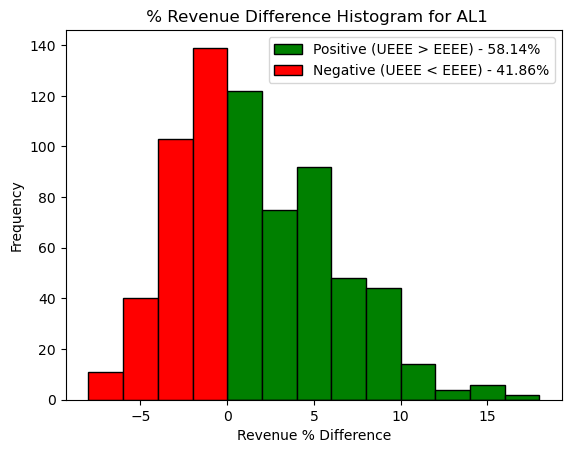

In [10]:
# revenue comparison for all the carriers
win_loss_histogram(df1['percent'], 'AL1')


In [11]:
# win_loss_histogram(df2['percent'], 'AL2')


In [12]:
# win_loss_histogram(df3['percent'], 'AL3')

In [13]:
# win_loss_histogram(df4['percent'], 'AL4')

In [14]:
# prepare the data for the model
df1.columns

Index(['tot_dmd', 'dmd_b', 'dmd_l', 'hi_b', 'hi_l', 'hi_both', 'hi_neither',
       'carrier', 'difference', 'percent'],
      dtype='object')

In [15]:
# preparing the data for the model 
df1['DiffSign'] = [1 if p > 0 else 0 for p in df1['difference']]
# df2['DiffSign'] = [1 if p > 0 else 0 for p in df2['difference']]
# df3['DiffSign'] = [1 if p > 0 else 0 for p in df3['difference']]
# df4['DiffSign'] = [1 if p > 0 else 0 for p in df4['difference']]


In [16]:

# create dfXt and dfYt for the model with specific columns
dfXt = dfX[['tot_dmd', 'dmd_b', 'dmd_l']]
dfYt = df1['DiffSign']

# print and verify the data shapes
print(dfXt.shape)
print(dfYt.shape)

(700, 3)
(700,)


In [17]:
# Try XGBoost
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(dfXt, dfYt, test_size=0.25, random_state=42)
model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.86%


<Figure size 1200x800 with 0 Axes>

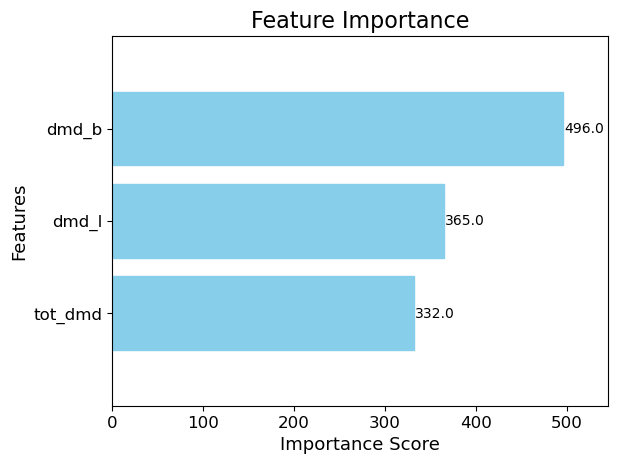

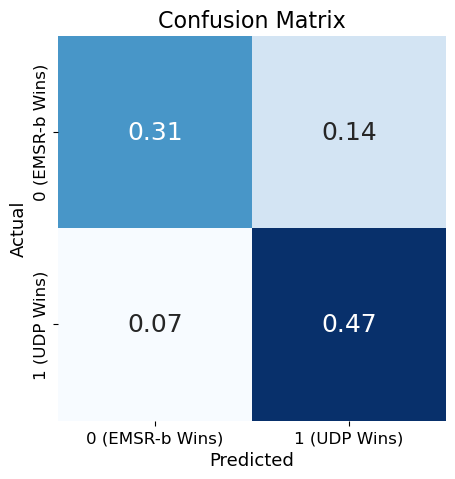

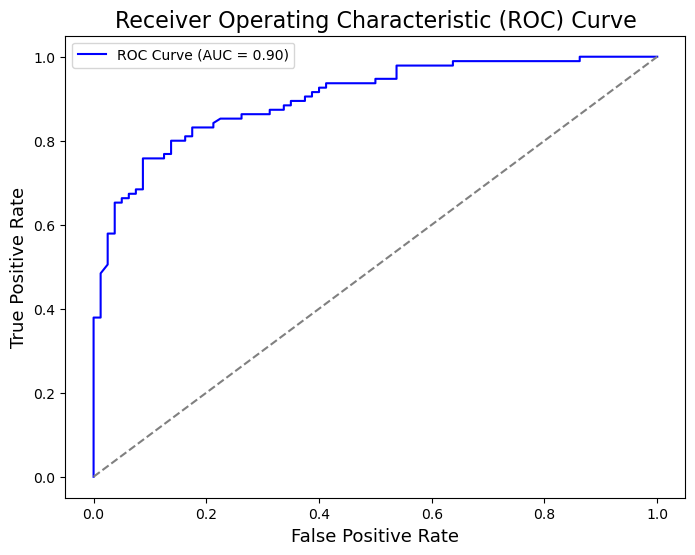

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from xgboost import plot_importance

# 1. Feature Importance Plot
plt.figure(figsize=(12, 8))
plot_importance(model, max_num_features=10, importance_type='weight', height=0.8)  # Adjust the height for wider bars
plt.title('Feature Importance', fontsize=16)
plt.grid(False)  # Remove grid lines

# Customize the color and style
ax = plt.gca()
for bar in ax.patches:
    bar.set_color('skyblue')  
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Importance Score', fontsize=13)
plt.ylabel('Features', fontsize=13)

plt.show()

# 2. Confusion Matrix

# Predict and compute confusion matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred, normalize="all")

# Plot confusion matrix
plt.figure(figsize=(5, 5))  # Adjust figure size for more room
sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues', cbar=False,
            xticklabels=['0 (EMSR-b Wins)', '1 (UDP Wins)'],
            yticklabels=['0 (EMSR-b Wins)', '1 (UDP Wins)'],
            annot_kws={"size": 18})  # Font size for annotations
plt.xlabel('Predicted', fontsize=13)
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 3. ROC Curve and AUC
y_proba = model.predict_proba(x_test)[:, 1]  # Probability for the positive class
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Reference line
plt.xlabel('False Positive Rate',fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.title('Receiver Operating Characteristic (ROC) Curve',fontsize=16)
plt.legend()
plt.show()

In [44]:
# Try logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# create dfXt and dfYt for the model with specific columns
dfXt = dfX[['tot_dmd', 'dmd_b', 'dmd_l', 'hi_b', 'hi_l', 'hi_both', 'hi_neither']]
dfYt = df1['DiffSign']

x_train, x_test, y_train, y_test = train_test_split(dfXt, dfYt, test_size=0.25, random_state=42)


logreg = LogisticRegression(random_state=16, solver="liblinear")
logreg.fit(x_train, y_train.values.ravel())
y_pred = logreg.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8228571428571428


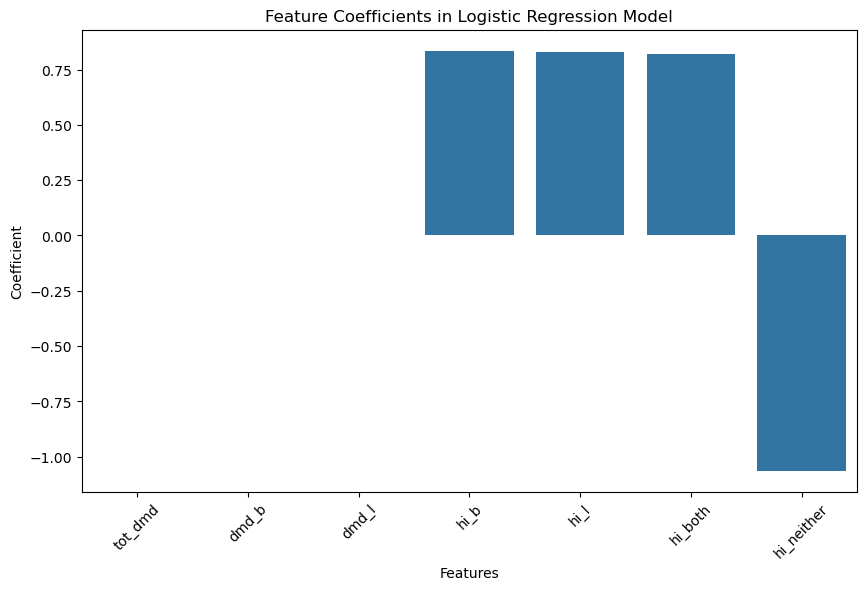

      Feature   Coefficient
0     tot_dmd -9.856944e-07
1       dmd_b -3.293935e-05
2       dmd_l  3.195367e-05
3        hi_b  8.347577e-01
4        hi_l  8.302232e-01
5     hi_both  8.203971e-01
6  hi_neither -1.063118e+00

Odds Ratios for each Feature:
       Feature  Odds Ratio
0     tot_dmd    0.999999
1       dmd_b    0.999967
2       dmd_l    1.000032
3        hi_b    2.304256
4        hi_l    2.293831
5     hi_both    2.271402
6  hi_neither    0.345377


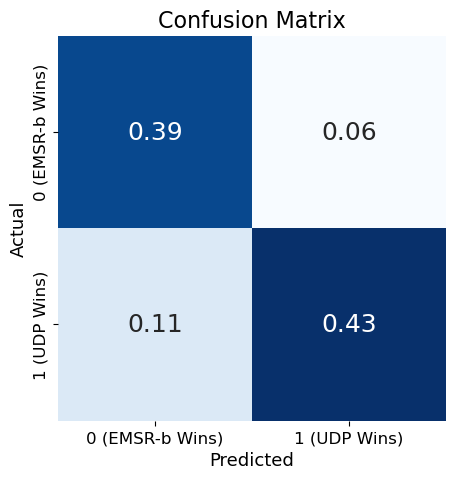

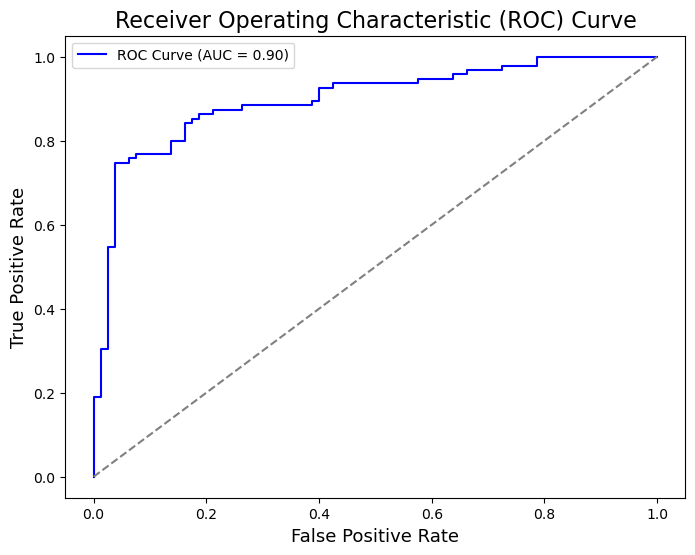

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Get coefficients and intercept
coefficients = logreg.coef_[0]
intercept = logreg.intercept_[0]
features = dfXt.columns

# 1. Coefficient Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Feature Coefficients in Logistic Regression Model')
plt.xticks(rotation=45)
plt.show()

# Print coefficients with names for reference
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
print(coef_df)

# Interpretation (odds ratio)
odds_ratios = np.exp(coefficients)
odds_ratio_df = pd.DataFrame({'Feature': features, 'Odds Ratio': odds_ratios})
print("\nOdds Ratios for each Feature:\n", odds_ratio_df)

# 2. Confusion Matrix (as percentages)
cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_, normalize="all")

# cm = confusion_matrix(y_test, y_pred, normalize="all")

# Plot confusion matrix
plt.figure(figsize=(5, 5))  # Adjust figure size for more room
sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues', cbar=False,
            xticklabels=['0 (EMSR-b Wins)', '1 (UDP Wins)'],
            yticklabels=['0 (EMSR-b Wins)', '1 (UDP Wins)'],
            annot_kws={"size": 18})  # Font size for annotations
plt.xlabel('Predicted', fontsize=13)
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


# 3. ROC Curve and AUC
y_proba = logreg.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Reference line
plt.xlabel('False Positive Rate',fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.title('Receiver Operating Characteristic (ROC) Curve',fontsize=16)
plt.legend()
plt.show()

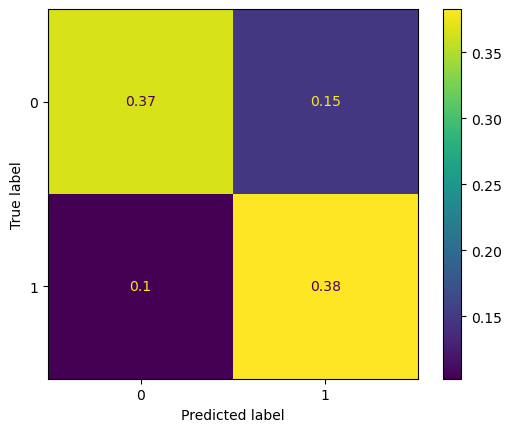

In [40]:
# Create a confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred, labels=logreg.classes_, normalize="all")
# cnf_matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,
                                      display_labels=logreg.classes_)
disp.plot()
plt.show()

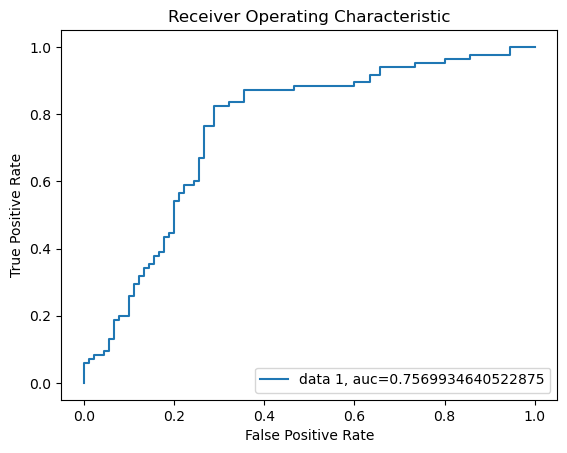

In [41]:
# Create a Receiver Operating Curve (ROC) with the Area Under the Curve (AUC)
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
# also plot the axis labels
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()